In [1]:
import pandas as pd

# Load the new CSV file
path = '/content/drive/MyDrive/研究/BCMP/Chicago/'
file_path_tripdata = path + '202311-divvy-tripdata.csv'
divvy_tripdata = pd.read_csv(file_path_tripdata)

# Display the first few rows of the dataframe to understand its structure and content
divvy_tripdata

ride_id  rideable_type           started_at  \
0       4EAD8F1AD547356B  electric_bike  2023-11-30 21:50:05   
1       6322270563BF5470  electric_bike  2023-11-03 09:44:02   
2       B37BDE091ECA38E0  electric_bike  2023-11-30 11:39:44   
3       CF0CA5DD26E4F90E   classic_bike  2023-11-08 10:01:45   
4       EB8381AA641348DB   classic_bike  2023-11-03 16:20:25   
...                  ...            ...                  ...   
362513  30B44BD4C16E688C   classic_bike  2023-11-24 08:39:27   
362514  094A79892812BAB9   classic_bike  2023-11-06 09:07:20   
362515  F0A7DF8A44FDA3CB  electric_bike  2023-11-10 19:35:30   
362516  4D5E3685BB913A3C   classic_bike  2023-11-27 09:11:23   
362517  1FA95C375BE4B6A6  electric_bike  2023-11-20 16:16:03   

                   ended_at          start_station_name start_station_id  \
0       2023-11-30 22:13:27             Millennium Park            13008   
1       2023-11-03 10:17:15      Broadway & Sheridan Rd            13323   
2       2023-11-30 11:40:08       State St & Pearson St     TA1307000061   
3       2023-11-08 10:27:05         Theater on the Lake     TA1308000001   
4       2023-11-03 16:54:25         Theater on the Lake     TA1308000001   
...                     ...                         ...              ...   
362513  2023-11-24 08:47:03   Clark St & Wellington Ave     TA1307000136   
362514  2023-11-06 09:10:00  Aberdeen St & Jackson Blvd            13157   
362515  2023-11-10 19:44:28      Halsted St & Roscoe St     TA1309000025   
362516  2023-11-27 09:13:23  Aberdeen St & Jackson Blvd            13157   
362517  2023-11-20 16:17:43  Aberdeen St & Jackson Blvd            13157   

                      end_station_name end_station_id  start_lat  start_lng  \
0        Pine Grove Ave & Waveland Ave   TA1307000150  41.881101 -87.624082   
1               Broadway & Sheridan Rd          13323  41.952868 -87.650035   
2                State St & Pearson St   TA1307000061  41.897533 -87.628694   
3                  Theater on the Lake   TA1308000001  41.926277 -87.630834   
4                  Theater on the Lake   TA1308000001  41.926277 -87.630834   
...                                ...            ...        ...        ...   
362513  Southport Ave & Wellington Ave   TA1307000006  41.936497 -87.647539   
362514        Peoria St & Jackson Blvd          13158  41.877726 -87.654787   
362515  Southport Ave & Wellington Ave   TA1307000006  41.943687 -87.648855   
362516        Peoria St & Jackson Blvd          13158  41.877726 -87.654787   
362517        Peoria St & Jackson Blvd          13158  41.877869 -87.654898   

          end_lat    end_lng member_casual  
0       41.949473 -87.646453        member  
1       41.952833 -87.649993        member  
2       41.897448 -87.628722        member  
3       41.926277 -87.630834        member  
4       41.926277 -87.630834        member  
...           ...        ...           ...  
362513  41.935775 -87.663600        member  
362514  41.877642 -87.649618        member  
362515  41.935775 -87.663600        member  
362516  41.877642 -87.649618        member  
362517  41.877642 -87.649618        member  

[362518 rows x 13 columns]

In [2]:
df = divvy_tripdata
# Recalculating electric and classic bike counts as actual counts instead of rates
electric_bike_start_counts = df[df['rideable_type'] == 'electric_bike'].groupby('start_station_name')['ride_id'].count()
classic_bike_start_counts = df[df['rideable_type'] == 'classic_bike'].groupby('start_station_name')['ride_id'].count()

# Electric and classic bike counts at both start and end stations
electric_bike_end_counts = df[df['rideable_type'] == 'electric_bike'].groupby('end_station_name')['ride_id'].count()
classic_bike_end_counts = df[df['rideable_type'] == 'classic_bike'].groupby('end_station_name')['ride_id'].count()

# Combining start and end counts
electric_bike_counts = electric_bike_start_counts.add(electric_bike_end_counts, fill_value=0)
classic_bike_counts = classic_bike_start_counts.add(classic_bike_end_counts, fill_value=0)

# Recalculating member and casual counts as actual counts instead of rates
member_counts = df[df['member_casual'] == 'member'].groupby('start_station_name')['ride_id'].count()
casual_counts = df[df['member_casual'] == 'casual'].groupby('start_station_name')['ride_id'].count()

# Member and casual counts at end stations
member_end_counts = df[df['member_casual'] == 'member'].groupby('end_station_name')['ride_id'].count()
casual_end_counts = df[df['member_casual'] == 'casual'].groupby('end_station_name')['ride_id'].count()

# Combining start and end counts for members and casual users
member_counts = member_counts.add(member_end_counts, fill_value=0)
casual_counts = casual_counts.add(casual_end_counts, fill_value=0)

# Total start and end counts for each station
start_counts = df.groupby('start_station_name')['ride_id'].count()
end_counts = df.groupby('end_station_name')['ride_id'].count()

# Average latitude and longitude for each start station
average_lat = df.groupby('start_station_name')['start_lat'].mean()
average_lng = df.groupby('start_station_name')['start_lng'].mean()

# Average latitude and longitude for each end station
average_lat_end = df.groupby('end_station_name')['end_lat'].mean()
average_lng_end = df.groupby('end_station_name')['end_lng'].mean()

# Combining start and end station latitude and longitude
average_lat = average_lat.add(average_lat_end, fill_value=0) / 2
average_lng = average_lng.add(average_lng_end, fill_value=0) / 2

# Combining the recalculated counts into a single DataFrame
aggregated_data = pd.DataFrame({
    'Electric Bike Count': electric_bike_counts,
    'Classic Bike Count': classic_bike_counts,
    'Start Count': start_counts,
    'End Count': end_counts,
    'Member Count': member_counts,
    'Casual Count': casual_counts,
    'Average Latitude': average_lat,
    'Average Longitude': average_lng
})

# Filling NaN values with 0
aggregated_data = aggregated_data.fillna(0)

# 整数値に変換する列を指定
columns_to_convert = ['Electric Bike Count', 'Classic Bike Count',
                      'Start Count', 'End Count',
                      'Member Count', 'Casual Count']

# 指定された列を整数値に変換
for column in columns_to_convert:
    aggregated_data[column] = aggregated_data[column].astype(int)

# Displaying the first few rows of the new aggregated data
aggregated_data

Electric Bike Count  Classic Bike Count  \
2112 W Peterson Ave                            56                  36   
63rd St Beach                                   7                  61   
900 W Harrison St                             999                1232   
Aberdeen St & Jackson Blvd                    998                1376   
Aberdeen St & Monroe St                       598                 954   
...                                           ...                 ...   
Woodlawn Ave & 55th St                        415                1391   
Woodlawn Ave & 58th St                        358                1224   
Woodlawn Ave & 75th St                         10                   5   
Woodlawn Ave & Lake Park Ave                   54                 125   
Yates Blvd & 75th St                           22                  22   

                              Start Count  End Count  Member Count  \
2112 W Peterson Ave                    45         47            74   
63rd St Beach                          38         30            53   
900 W Harrison St                    1128       1103          1706   
Aberdeen St & Jackson Blvd           1286       1088          1924   
Aberdeen St & Monroe St               789        763          1240   
...                                   ...        ...           ...   
Woodlawn Ave & 55th St                989        817          1342   
Woodlawn Ave & 58th St                768        814          1223   
Woodlawn Ave & 75th St                 10          5             7   
Woodlawn Ave & Lake Park Ave           92         87           137   
Yates Blvd & 75th St                   24         20             8   

                              Casual Count  Average Latitude  \
2112 W Peterson Ave                     18         41.991177   
63rd St Beach                           15         41.780914   
900 W Harrison St                      525         41.874776   
Aberdeen St & Jackson Blvd             450         41.877730   
Aberdeen St & Monroe St                312         41.880415   
...                                    ...               ...   
Woodlawn Ave & 55th St                 464         41.795269   
Woodlawn Ave & 58th St                 359         41.789386   
Woodlawn Ave & 75th St                   8         41.759174   
Woodlawn Ave & Lake Park Ave            42         41.814090   
Yates Blvd & 75th St                    36         41.758762   

                              Average Longitude  
2112 W Peterson Ave                  -87.683597  
63rd St Beach                        -87.576320  
900 W Harrison St                    -87.649821  
Aberdeen St & Jackson Blvd           -87.654801  
Aberdeen St & Monroe St              -87.655537  
...                                         ...  
Woodlawn Ave & 55th St               -87.596473  
Woodlawn Ave & 58th St               -87.596482  
Woodlawn Ave & 75th St               -87.595761  
Woodlawn Ave & Lake Park Ave         -87.597009  
Yates Blvd & 75th St                 -87.566439  

[1198 rows x 8 columns]

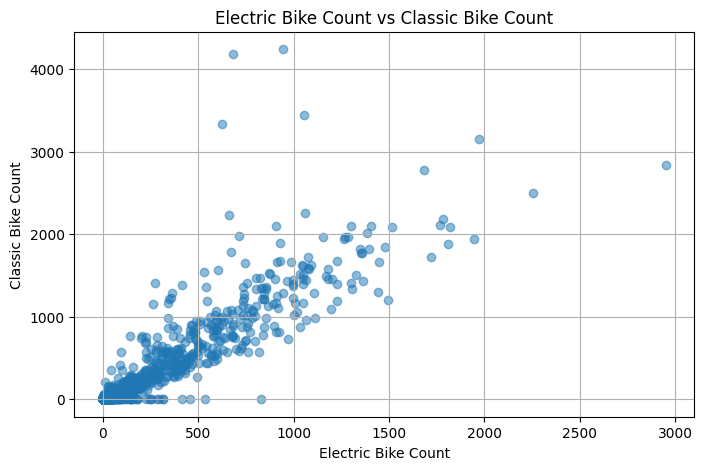

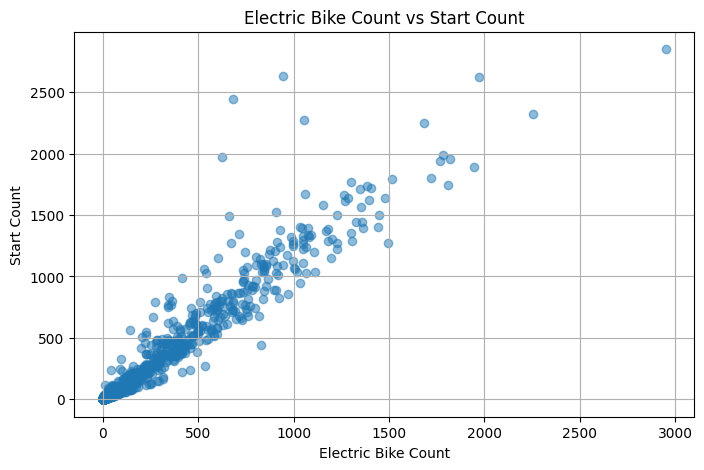

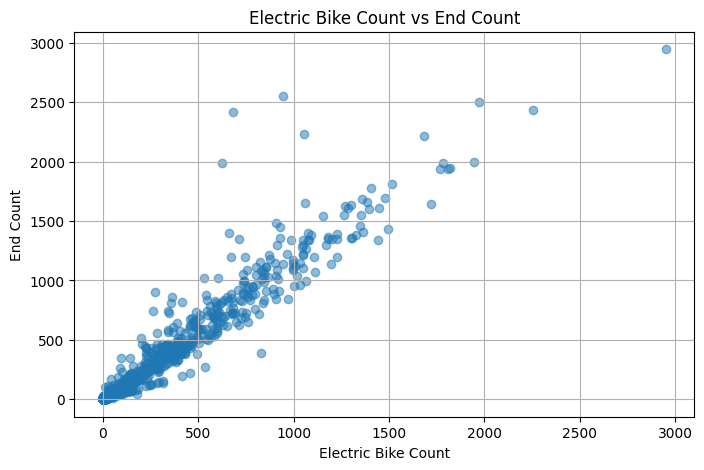

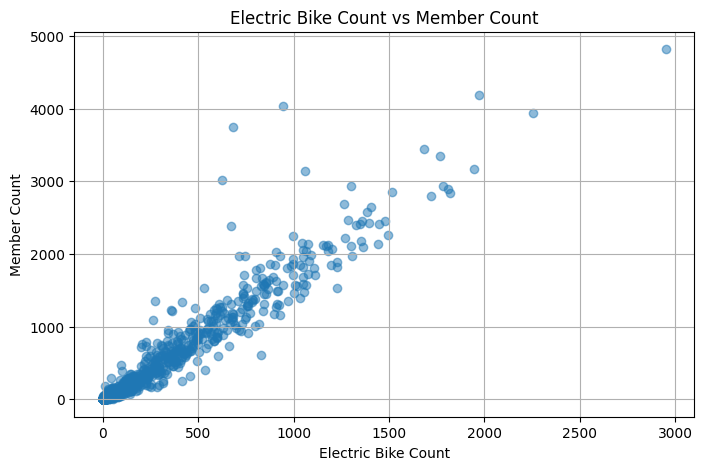

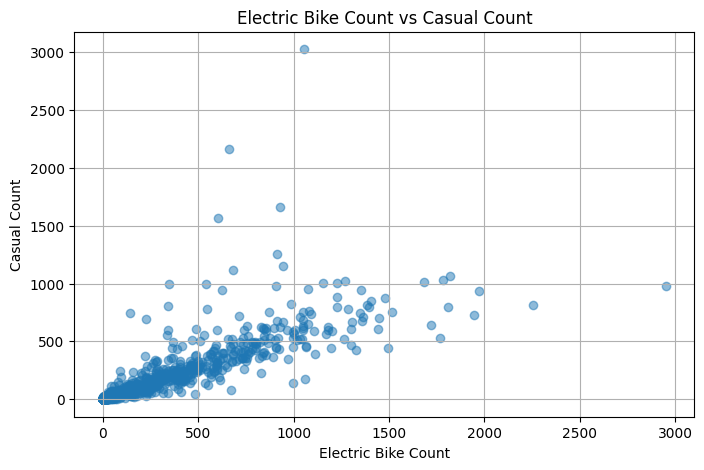

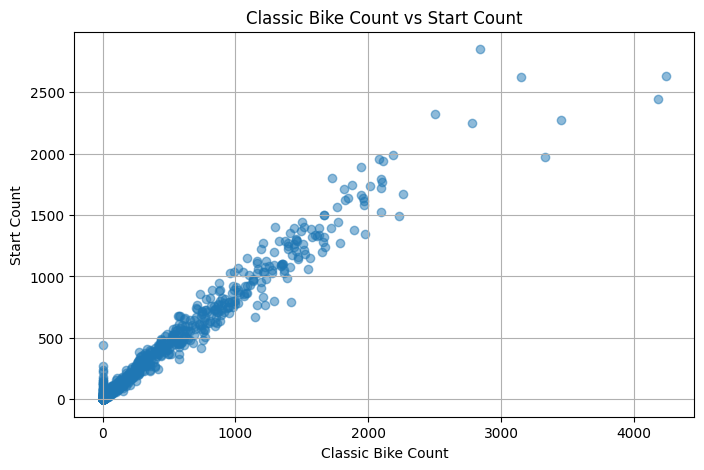

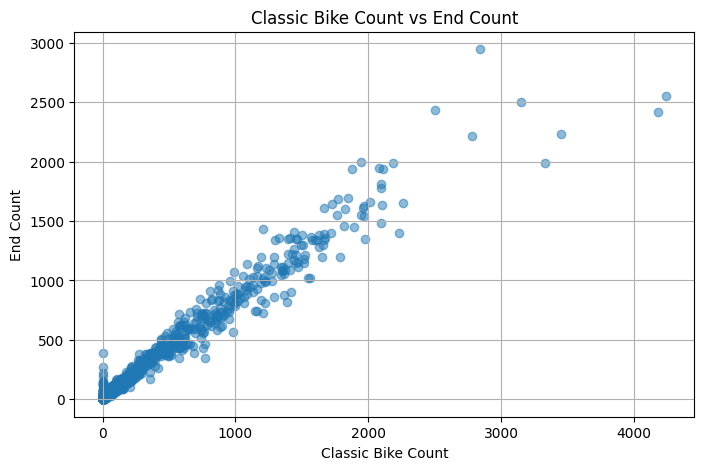

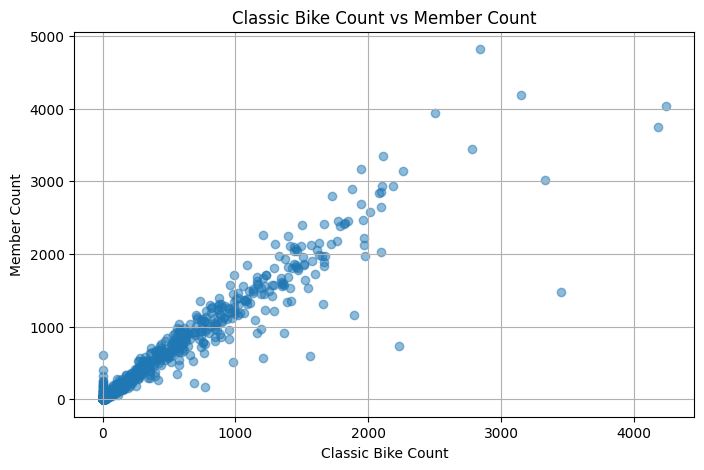

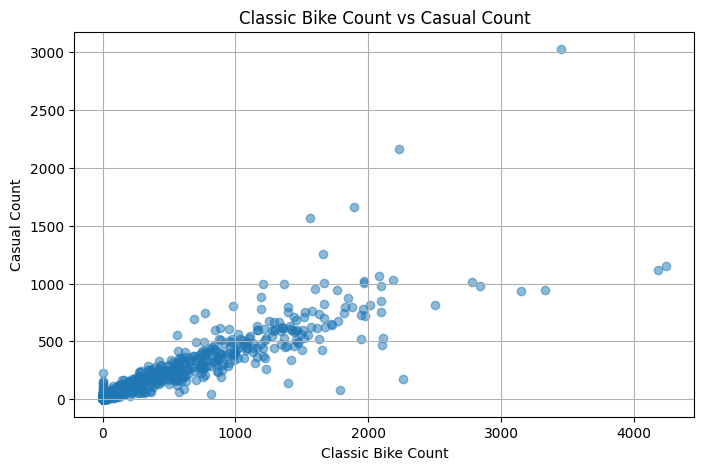

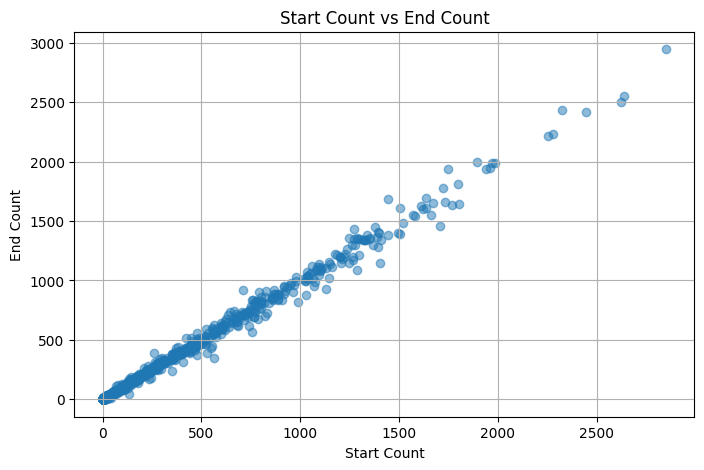

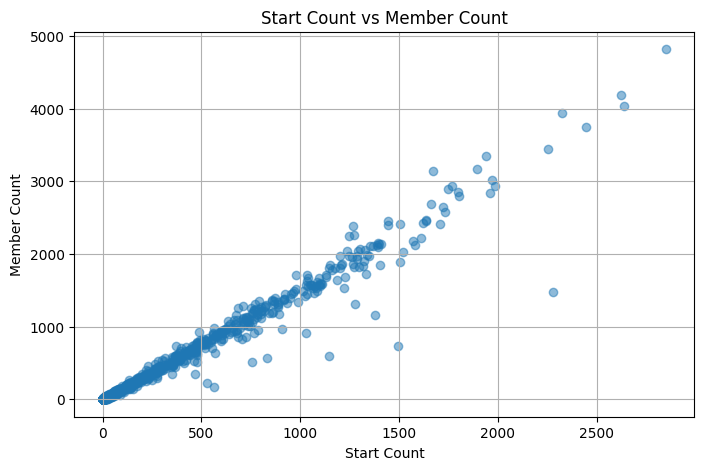

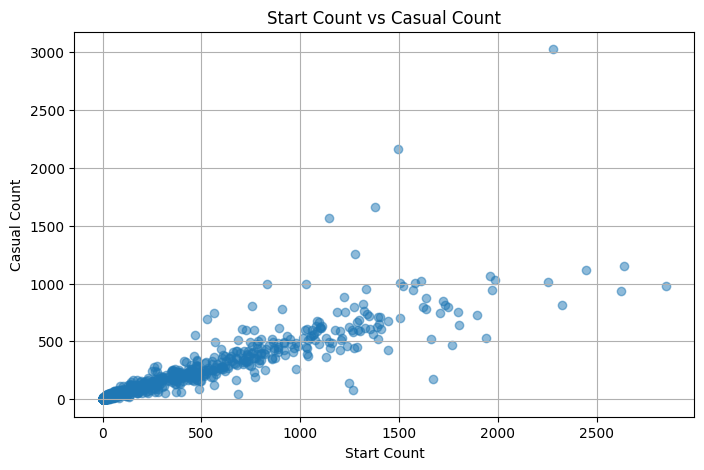

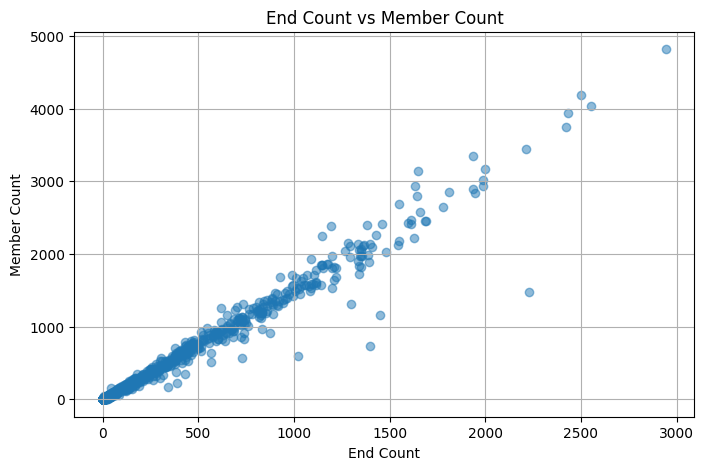

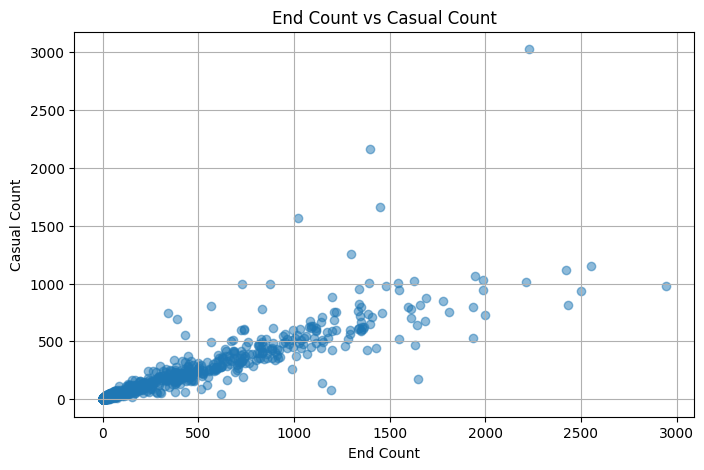

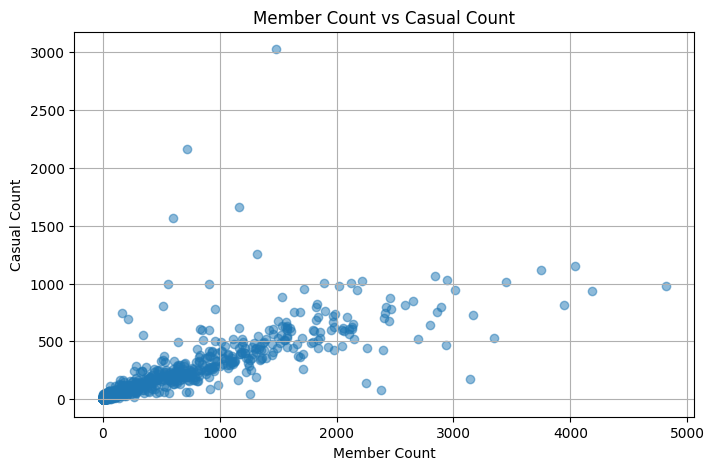

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

# 列名のリスト
columns = ['Electric Bike Count', 'Classic Bike Count', 'Start Count', 'End Count', 'Member Count', 'Casual Count']

# 全ての組み合わせの散布図を描画する
for col1, col2 in combinations(columns, 2):
    plt.figure(figsize=(8, 5))
    plt.scatter(aggregated_data[col1], aggregated_data[col2], alpha=0.5)
    plt.title(f'{col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid()
    plt.show()


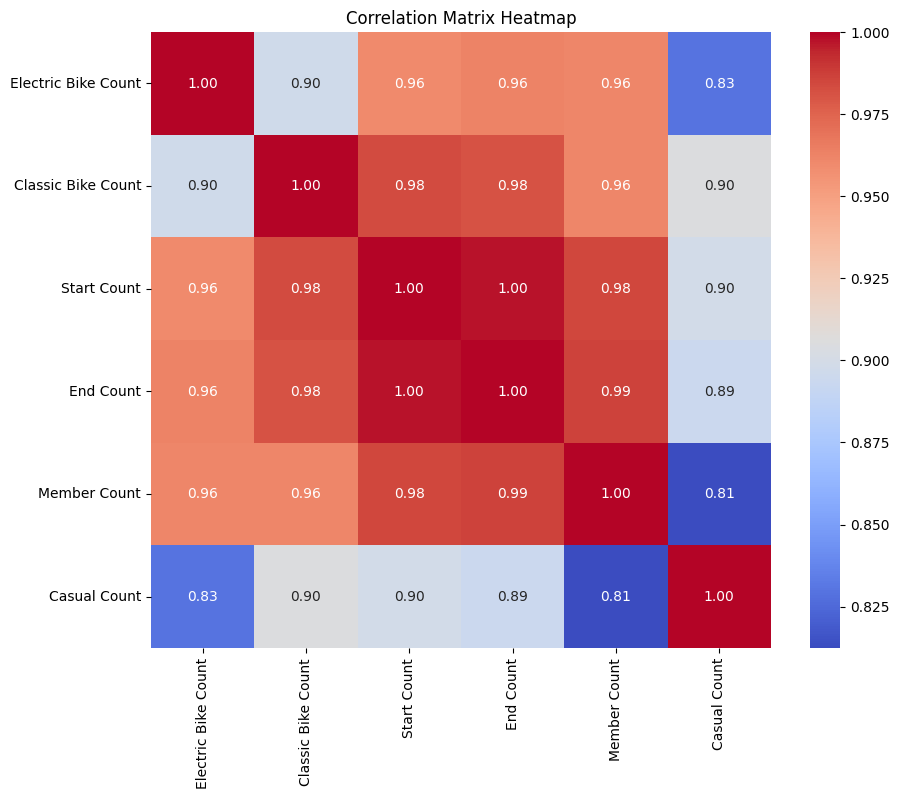

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 列名のリスト
columns = ['Electric Bike Count', 'Classic Bike Count', 'Start Count', 'End Count', 'Member Count', 'Casual Count']

# 相関係数を計算
correlation_matrix = aggregated_data[columns].corr()

# ヒートマップの描画
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 既存のコードで集計されたデータフレームを用意
# ...

# 列名のリスト
columns = ['Electric Bike Count', 'Classic Bike Count', 'Start Count', 'End Count', 'Member Count', 'Casual Count']

# データの標準化
scaler = StandardScaler()
scaled_data = scaler.fit_transform(aggregated_data[columns])

# PCAの実行
pca = PCA()
pca.fit(scaled_data)

# 累積寄与率が80%を超えるまでの主成分を選択
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.80) + 1

# 最初のn_components主成分でPCAを再実行
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

# 各主成分のウェイトと項目ごとのウェイトの表
pca_weights = pd.DataFrame(pca.components_, columns=columns, index=[f'PC{i+1}' for i in range(n_components)])

print("PCA Component Weights:\n", pca_weights)
print("\nExplained Variance Ratio:", pca.explained_variance_ratio_)


PCA Component Weights:
      Electric Bike Count  Classic Bike Count  Start Count  End Count  \
PC1             0.403827            0.412129     0.419096   0.418998   

     Member Count  Casual Count  
PC1       0.41098      0.383364  

Explained Variance Ratio: [0.94618721]


In [6]:
!pip install folium

In [7]:
import folium
import matplotlib.pyplot as plt

# 利用回数の合計を計算（例えば、Start CountとEnd Countの合計）
aggregated_data['Total Usage'] = aggregated_data['Start Count'] + aggregated_data['End Count']

# 最大利用回数を持つステーションを見つける
max_usage_station = aggregated_data[aggregated_data['Total Usage'] == aggregated_data['Total Usage'].max()]

# 最大利用回数を持つステーションの平均緯度・経度を取得
max_usage_lat = max_usage_station['Average Latitude'].values[0]
max_usage_lng = max_usage_station['Average Longitude'].values[0]

# 地図の初期化（適切な中心地とズームレベルを設定）
m = folium.Map(location=[max_usage_lat, max_usage_lng], zoom_start=13)

# 最大利用回数を求める
max_usage = aggregated_data['Total Usage'].max()

# 各ステーションのマーカーを追加
for idx, row in aggregated_data.iterrows():
    # 利用回数に応じたマーカーサイズ
    marker_size = row['Total Usage'] / max_usage * 40  # サイズの調整
    folium.CircleMarker(
        location=[row['Average Latitude'], row['Average Longitude']],
        radius=marker_size,
        popup=f'{idx}<br>Usage: {row["Total Usage"]}',
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)

# 地図を表示
m


In [8]:
import folium
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 利用回数に応じた色の設定
def get_color(usage, max_usage):
    norm = plt.Normalize(aggregated_data['Total Usage'].min(), max_usage)
    cmap = plt.cm.Reds #Reds
    rgb = cmap(norm(usage))[:3]
    return mcolors.rgb2hex(rgb)

# 最大利用回数を持つステーションの平均緯度・経度を取得
max_usage = aggregated_data['Total Usage'].max()
max_usage_lat = aggregated_data.loc[aggregated_data['Total Usage'].idxmax(), 'Average Latitude']
max_usage_lng = aggregated_data.loc[aggregated_data['Total Usage'].idxmax(), 'Average Longitude']

# 地図の初期化
m = folium.Map(location=[max_usage_lat, max_usage_lng], zoom_start=12)

# 各ステーションのマーカーを追加
for idx, row in aggregated_data.iterrows():
    color = get_color(row['Total Usage'], max_usage)
    folium.CircleMarker(
        location=[row['Average Latitude'], row['Average Longitude']],
        radius=5,  # 固定サイズ
        popup=f'{idx}<br>Usage: {row["Total Usage"]}',
        color=color,
        fill=True,
        fill_color=color
    ).add_to(m)

# 地図を表示
m


In [9]:
# ステーション間のトリップの回数をカウント
transition_counts = df.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='transition_count')

# 推移回数行列の作成
transition_matrix = transition_counts.pivot_table(index='start_station_name', columns='end_station_name', values='transition_count', fill_value=0)

# 結果を表示（上位の行のみ）
transition_matrix


end_station_name              2112 W Peterson Ave  63rd St Beach  \
start_station_name                                                 
2112 W Peterson Ave                             8              0   
63rd St Beach                                   0              3   
900 W Harrison St                               0              0   
Aberdeen St & Jackson Blvd                      0              0   
Aberdeen St & Monroe St                         0              0   
...                                           ...            ...   
Woodlawn Ave & 55th St                          0              0   
Woodlawn Ave & 58th St                          0              1   
Woodlawn Ave & 75th St                          0              0   
Woodlawn Ave & Lake Park Ave                    0              0   
Yates Blvd & 75th St                            0              0   

end_station_name              900 W Harrison St  Aberdeen St & Jackson Blvd  \
start_station_name                                                            
2112 W Peterson Ave                           0                           0   
63rd St Beach                                 0                           0   
900 W Harrison St                            31                          48   
Aberdeen St & Jackson Blvd                   54                          85   
Aberdeen St & Monroe St                      12                          10   
...                                         ...                         ...   
Woodlawn Ave & 55th St                        0                           0   
Woodlawn Ave & 58th St                        0                           0   
Woodlawn Ave & 75th St                        0                           0   
Woodlawn Ave & Lake Park Ave                  0                           0   
Yates Blvd & 75th St                          0                           0   

end_station_name              Aberdeen St & Monroe St  \
start_station_name                                      
2112 W Peterson Ave                                 0   
63rd St Beach                                       0   
900 W Harrison St                                  10   
Aberdeen St & Jackson Blvd                         10   
Aberdeen St & Monroe St                            47   
...                                               ...   
Woodlawn Ave & 55th St                              0   
Woodlawn Ave & 58th St                              0   
Woodlawn Ave & 75th St                              0   
Woodlawn Ave & Lake Park Ave                        0   
Yates Blvd & 75th St                                0   

end_station_name              Aberdeen St & Randolph St  Ada St & 113th St  \
start_station_name                                                           
2112 W Peterson Ave                                   0                  0   
63rd St Beach                                         0                  0   
900 W Harrison St                                     6                  0   
Aberdeen St & Jackson Blvd                           12                  0   
Aberdeen St & Monroe St                              24                  0   
...                                                 ...                ...   
Woodlawn Ave & 55th St                                0                  0   
Woodlawn Ave & 58th St                                0                  0   
Woodlawn Ave & 75th St                                0                  0   
Woodlawn Ave & Lake Park Ave                          0                  0   
Yates Blvd & 75th St                                  0                  0   

end_station_name              Ada St & Washington Blvd  Adler Planetarium  \
start_station_name                                                          
2112 W Peterson Ave                                  0                  0   
63rd St Beach                                        0                  0   
900 W Harrison St     

In [10]:
# 行と列の両方に存在するステーション名を抽出
common_stations = set(transition_matrix.index) & set(transition_matrix.columns)

# 行と列の両方に含まれるステーションのみに行列を制限
filtered_matrix = transition_matrix.loc[common_stations, common_stations]

# filtered_matrix の各行の合計を計算
row_sums = filtered_matrix.sum(axis=1)

# 行和が0でないステーションのリストを取得
non_zero_stations = row_sums[row_sums != 0].index

# 行和が0でないステーションに対応する行と列のみを保持
filtered_matrix = filtered_matrix.loc[non_zero_stations, non_zero_stations]

# 各行の合計を新しい列として追加
filtered_matrix['Row Sum'] = row_sums

filtered_matrix.to_csv(path + 'transition_count_matrix.csv', index=True)

# 結果を表示
filtered_matrix

<ipython-input-10-91ed89cb0ab1>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  filtered_matrix = transition_matrix.loc[common_stations, common_stations]


start_station_name                        Public Rack - Milwaukee Ave & Addison St  \
start_station_name                                                                   
Public Rack - Milwaukee Ave & Addison St                                         0   
Sacramento Blvd & Fulton Ave                                                     0   
Public Rack - Drake Ave & Leland Ave                                             0   
Public Rack - Racine Ave & 109th Pl                                              0   
Washtenaw Ave & Peterson Ave                                                     0   
...                                                                            ...   
Leavitt St & Archer Ave                                                          0   
Stewart Ave & 83rd St                                                            0   
Wells St & Polk St                                                               0   
Pulaski Rd & Congress Pkwy                                                       0   
Public Rack - Springfield & 79th                                                 0   

start_station_name                        Sacramento Blvd & Fulton Ave  \
start_station_name                                                       
Public Rack - Milwaukee Ave & Addison St                             0   
Sacramento Blvd & Fulton Ave                                         5   
Public Rack - Drake Ave & Leland Ave                                 0   
Public Rack - Racine Ave & 109th Pl                                  0   
Washtenaw Ave & Peterson Ave                                         0   
...                                                                ...   
Leavitt St & Archer Ave                                              0   
Stewart Ave & 83rd St                                                0   
Wells St & Polk St                                                   0   
Pulaski Rd & Congress Pkwy                                           0   
Public Rack - Springfield & 79th                                     0   

start_station_name                        Public Rack - Drake Ave & Leland Ave  \
start_station_name                                                               
Public Rack - Milwaukee Ave & Addison St                                     0   
Sacramento Blvd & Fulton Ave                                                 0   
Public Rack - Drake Ave & Leland Ave                                         1   
Public Rack - Racine Ave & 109th Pl                                          0   
Washtenaw Ave & Peterson Ave                                                 0   
...                                                                        ...   
Leavitt St & Archer Ave                                                      0   
Stewart Ave & 83rd St                                                        0   
Wells St & Polk St                                                           0   
Pulaski Rd & Congress Pkwy                                                   0   
Public Rack - Springfield & 79th                                             0   

start_station_name                        Public Rack - Racine Ave & 109th Pl  \
start_station_name                                                              
Public Rack - Milwaukee Ave & Addison St                                    0   
Sacramento Blvd & Fulton Ave                                                0   
Public Rack - Drake Ave & Leland Ave                                        0   
Public Rack - Racine Ave & 109th Pl                                         7   
Washtenaw Ave & Peterson Ave                                                0   
...                                                                       ...   
Leavitt St & Archer Ave                                                     0   
Stewart Ave & 83rd St                                                       0   
Wells St & Polk St                       

In [11]:
# Adjust the code to exclude the last column (row sum) in the normalization process
# We only use the numerical columns except the last one for division
numerical_part_excluding_sum = filtered_matrix.iloc[:, 1:-1]  # Exclude the first (string) column and the last (row sum) column
row_sums_excluding_last_column = numerical_part_excluding_sum.sum(axis=1)

# Divide each cell by the row sum to normalize the rows, excluding the last column
normalized_matrix_excluding_sum = numerical_part_excluding_sum.div(row_sums_excluding_last_column, axis=0)

# Replace NaN values with 0
normalized_matrix_excluding_sum = normalized_matrix_excluding_sum.fillna(0)

# Re-add the station names as the first column
transition_probability_matrix = pd.concat([filtered_matrix.iloc[:, 0], normalized_matrix_excluding_sum], axis=1)

# 推移確率行列をCSVファイルに保存
transition_probability_matrix.to_csv(path + 'transition_probability_matrix.csv', index=True)

# Display the first few rows of the transition probability matrix excluding the row sum column
transition_probability_matrix


Public Rack - Milwaukee Ave & Addison St  \
start_station_name                                                                   
Public Rack - Milwaukee Ave & Addison St                                         0   
Sacramento Blvd & Fulton Ave                                                     0   
Public Rack - Drake Ave & Leland Ave                                             0   
Public Rack - Racine Ave & 109th Pl                                              0   
Washtenaw Ave & Peterson Ave                                                     0   
...                                                                            ...   
Leavitt St & Archer Ave                                                          0   
Stewart Ave & 83rd St                                                            0   
Wells St & Polk St                                                               0   
Pulaski Rd & Congress Pkwy                                                       0   
Public Rack - Springfield & 79th                                                 0   

                                          Sacramento Blvd & Fulton Ave  \
start_station_name                                                       
Public Rack - Milwaukee Ave & Addison St                      0.000000   
Sacramento Blvd & Fulton Ave                                  0.357143   
Public Rack - Drake Ave & Leland Ave                          0.000000   
Public Rack - Racine Ave & 109th Pl                           0.000000   
Washtenaw Ave & Peterson Ave                                  0.000000   
...                                                                ...   
Leavitt St & Archer Ave                                       0.000000   
Stewart Ave & 83rd St                                         0.000000   
Wells St & Polk St                                            0.000000   
Pulaski Rd & Congress Pkwy                                    0.000000   
Public Rack - Springfield & 79th                              0.000000   

                                          Public Rack - Drake Ave & Leland Ave  \
start_station_name                                                               
Public Rack - Milwaukee Ave & Addison St                                   0.0   
Sacramento Blvd & Fulton Ave                                               0.0   
Public Rack - Drake Ave & Leland Ave                                       0.2   
Public Rack - Racine Ave & 109th Pl                                        0.0   
Washtenaw Ave & Peterson Ave                                               0.0   
...                                                                        ...   
Leavitt St & Archer Ave                                                    0.0   
Stewart Ave & 83rd St                                                      0.0   
Wells St & Polk St                                                         0.0   
Pulaski Rd & Congress Pkwy                                                 0.0   
Public Rack - Springfield & 79th                                           0.0   

                                          Public Rack - Racine Ave & 109th Pl  \
start_station_name                                                              
Public Rack - Milwaukee Ave & Addison St                             0.000000   
Sacramento Blvd & Fulton Ave                                         0.000000   
Public Rack - Drake Ave & Leland Ave                                 0.000000   
Public Rack - Racine Ave & 109th Pl                                  0.411765   
Washtenaw Ave & Peterson Ave                                         0.000000   
...                                                                       ...   
Leavitt St & Archer Ave                                              0.000000   
Stewart Ave & 83rd St                                                0.000000   
Wells St & Polk St                                                   0.000000   
Pu

<Figure size 2000x1500 with 0 Axes>

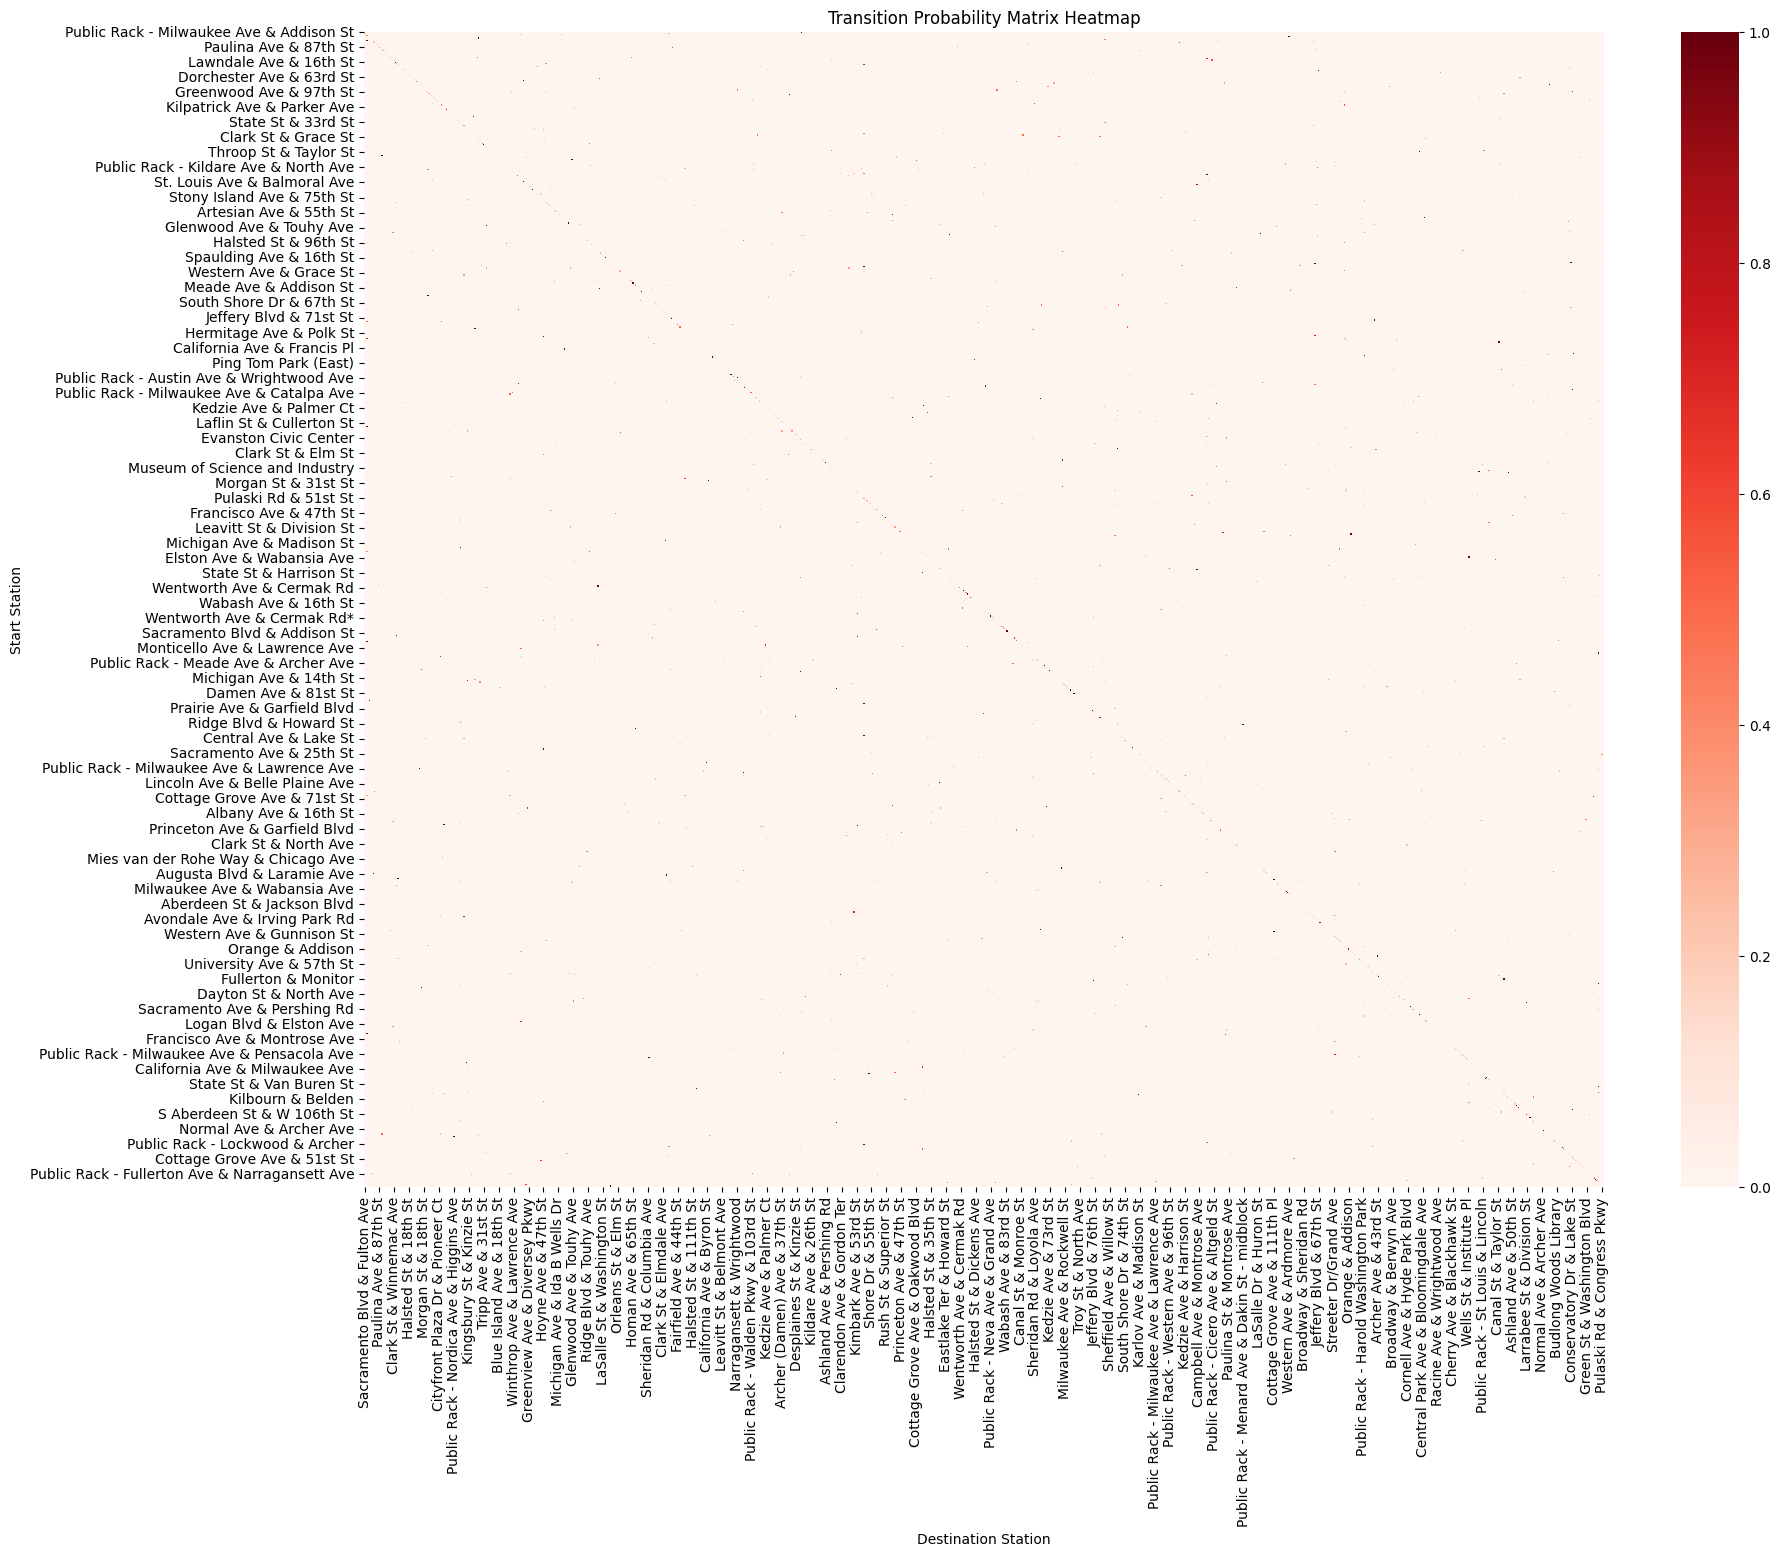

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the heatmap
plt.figure(figsize=(20, 15))

# Adjust the heatmap color mapping to use red for high values and white for low values
plt.figure(figsize=(20, 15))
sns.heatmap(transition_probability_matrix.iloc[:, 1:], cmap='Reds')

plt.title('Transition Probability Matrix Heatmap')
plt.xlabel('Destination Station')
plt.ylabel('Start Station')

# Display the heatmap
plt.show()

In [14]:
import pandas as pd

df = divvy_tripdata

# 2. Convert 'started_at' and 'ended_at' to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# 3. Calculate the travel time for each trip
df['travel_time'] = df['ended_at'] - df['started_at']

# 4. Convert travel time to minutes
df['travel_time_min'] = df['travel_time'].dt.total_seconds() / 60

# 5. Group by start and end station, calculate total travel time, number of trips, and mean travel time
station_stats = df.groupby(['start_station_name', 'end_station_name']).agg(
    total_travel_time_min=('travel_time_min', 'sum'),
    number_of_trips=('travel_time_min', 'count'),
    mean_travel_time_min=('travel_time_min', 'mean')
).reset_index()

# Extracting the station names used in the transition probability matrix (second uploaded file)
used_stations = set(transition_probability_matrix.columns[1:]) # Ignoring the first column as it's also a station name

# Filter the station_stats dataframe to include only those rows where both the start and end stations are in the used_stations set
filtered_station_stats = station_stats[
    (station_stats['start_station_name'].isin(used_stations)) &
    (station_stats['end_station_name'].isin(used_stations))
]

filtered_station_stats


start_station_name             end_station_name  \
0       2112 W Peterson Ave          2112 W Peterson Ave   
1       2112 W Peterson Ave     Broadway & Granville Ave   
2       2112 W Peterson Ave       Broadway & Sheridan Rd   
3       2112 W Peterson Ave  Campbell Ave & Montrose Ave   
4       2112 W Peterson Ave        Clark St & Berwyn Ave   
...                     ...                          ...   
56253  Yates Blvd & 75th St       Phillips Ave & 83rd St   
56254  Yates Blvd & 75th St     South Shore Dr & 67th St   
56255  Yates Blvd & 75th St     South Shore Dr & 71st St   
56256  Yates Blvd & 75th St   Stony Island Ave & 75th St   
56257  Yates Blvd & 75th St         Yates Blvd & 75th St   

       total_travel_time_min  number_of_trips  mean_travel_time_min  
0                   8.383333                8              1.047917  
1                  25.100000                2             12.550000  
2                  16.000000                1             16.000000  
3                  20.266667                1             20.266667  
4                  10.783333                1             10.783333  
...                      ...              ...                   ...  
56253               6.833333                1              6.833333  
56254               3.683333                1              3.683333  
56255              22.350000                8              2.793750  
56256               6.950000                1              6.950000  
56257              53.366667                2             26.683333  

[56074 rows x 5 columns]

from matplotlib import pyplot as plt
_df_0['total_travel_time_min'].plot(kind='hist', bins=20, title='total_travel_time_min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['number_of_trips'].plot(kind='hist', bins=20, title='number_of_trips')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['mean_travel_time_min'].plot(kind='hist', bins=20, title='mean_travel_time_min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='total_travel_time_min', y='number_of_trips', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='number_of_trips', y='mean_travel_time_min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['total_travel_time_min'].plot(kind='line', figsize=(8, 4), title='total_travel_time_min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['number_of_trips'].plot(kind='line', figsize=(8, 4), title='number_of_trips')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['mean_travel_time_min'].plot(kind='line', figsize=(8, 4), title='mean_travel_time_min')
plt.gca().spines[['top', 'right']].set_visible(False)

In [19]:
# Aligning the station names exactly with the transition probability matrix, excluding any extra stations
# First, we adjust the list of station names to exclude the extra station (if any)
aligned_stations = set(transition_probability_matrix.columns) - {'start_station_name'}

# Filter the station_stats dataframe to include only those rows where both the start and end stations are in the aligned_stations set
filtered_station_stats = station_stats[
    (station_stats['start_station_name'].isin(aligned_stations)) &
    (station_stats['end_station_name'].isin(aligned_stations))
]

# Creating a pivot table for the mean travel times, exactly aligned with the stations in the transition probability matrix
mean_travel_time_matrix = filtered_station_stats.pivot(
    index='start_station_name',
    columns='end_station_name',
    values='mean_travel_time_min'
)

# Filling NaN values with 0, assuming no travel time for non-existent trips
mean_travel_time_matrix = mean_travel_time_matrix.fillna(0)

# Reindexing the matrix to include only the stations from the transition probability matrix, filling missing values with 0
mean_travel_time_matrix = mean_travel_time_matrix.reindex(
    index=aligned_stations,
    columns=aligned_stations,
    fill_value=0
)

mean_travel_time_matrix.to_csv(path + 'mean_travel_time_matrix', index=True)

mean_travel_time_matrix


end_station_name                          Public Rack - Milwaukee Ave & Addison St  \
start_station_name                                                                   
Public Rack - Milwaukee Ave & Addison St                                       0.0   
Sacramento Blvd & Fulton Ave                                                   0.0   
Public Rack - Drake Ave & Leland Ave                                           0.0   
Public Rack - Racine Ave & 109th Pl                                            0.0   
Washtenaw Ave & Peterson Ave                                                   0.0   
...                                                                            ...   
Leavitt St & Archer Ave                                                        0.0   
Stewart Ave & 83rd St                                                          0.0   
Wells St & Polk St                                                             0.0   
Pulaski Rd & Congress Pkwy                                                     0.0   
Public Rack - Springfield & 79th                                               0.0   

end_station_name                          Sacramento Blvd & Fulton Ave  \
start_station_name                                                       
Public Rack - Milwaukee Ave & Addison St                      0.000000   
Sacramento Blvd & Fulton Ave                                  0.406667   
Public Rack - Drake Ave & Leland Ave                          0.000000   
Public Rack - Racine Ave & 109th Pl                           0.000000   
Washtenaw Ave & Peterson Ave                                  0.000000   
...                                                                ...   
Leavitt St & Archer Ave                                       0.000000   
Stewart Ave & 83rd St                                         0.000000   
Wells St & Polk St                                            0.000000   
Pulaski Rd & Congress Pkwy                                    0.000000   
Public Rack - Springfield & 79th                              0.000000   

end_station_name                          Public Rack - Drake Ave & Leland Ave  \
start_station_name                                                               
Public Rack - Milwaukee Ave & Addison St                                  0.00   
Sacramento Blvd & Fulton Ave                                              0.00   
Public Rack - Drake Ave & Leland Ave                                      0.25   
Public Rack - Racine Ave & 109th Pl                                       0.00   
Washtenaw Ave & Peterson Ave                                              0.00   
...                                                                        ...   
Leavitt St & Archer Ave                                                   0.00   
Stewart Ave & 83rd St                                                     0.00   
Wells St & Polk St                                                        0.00   
Pulaski Rd & Congress Pkwy                                                0.00   
Public Rack - Springfield & 79th                                          0.00   

end_station_name                          Public Rack - Racine Ave & 109th Pl  \
start_station_name                                                              
Public Rack - Milwaukee Ave & Addison St                             0.000000   
Sacramento Blvd & Fulton Ave                                         0.000000   
Public Rack - Drake Ave & Leland Ave                                 0.000000   
Public Rack - Racine Ave & 109th Pl                                 15.319048   
Washtenaw Ave & Peterson Ave                                         0.000000   
...                                                                       ...   
Leavitt St & Archer Ave                                              0.000000   
Stewart Ave & 83rd St                                                0.000000   
Wells St & Polk St                       